In [1]:
import pandas as pd
df = pd.read_csv("heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [2]:
df.shape

(918, 12)

In [3]:
X = df[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
y = df['HeartDisease']

In [4]:
X.shape

(918, 11)

In [5]:
y.shape

(918,)

In [6]:
print("Missing values in X:")
print(X.isnull().sum())

Missing values in X:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64


In [7]:
print("Missing values in y:")
print(y.isnull().sum())

Missing values in y:
0


In [8]:
from sklearn.preprocessing import LabelEncoder

# Copy original features
X_encoded = X.copy()

# Label Encode binary categorical columns
binary_cols = ['Sex', 'ExerciseAngina']
le = LabelEncoder()
for col in binary_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# One-Hot Encode multi-class categorical columns
multi_class_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
X_encoded = pd.get_dummies(X_encoded, columns=multi_class_cols, drop_first=True)

In [9]:
X_encoded.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,False,True,False,True,False,False,True
5,39,1,120,339,0,170,0,0.0,False,True,False,True,False,False,True
6,45,0,130,237,0,170,0,0.0,True,False,False,True,False,False,True
7,54,1,110,208,0,142,0,0.0,True,False,False,True,False,False,True
8,37,1,140,207,0,130,1,1.5,False,False,False,True,False,True,False
9,48,0,120,284,0,120,0,0.0,True,False,False,True,False,False,True


In [10]:
X_encoded.shape

(918, 15)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(734, 15)


Logistic Regression
Accuracy: 0.8533
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



/home/arindam100/ml-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


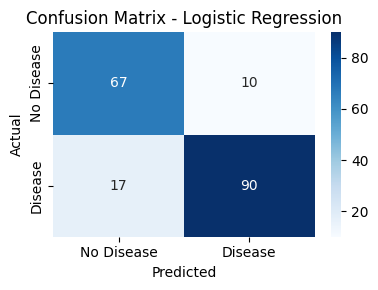


K-Nearest Neighbors
Accuracy: 0.7065
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        77
           1       0.77      0.70      0.74       107

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.71      0.71      0.71       184



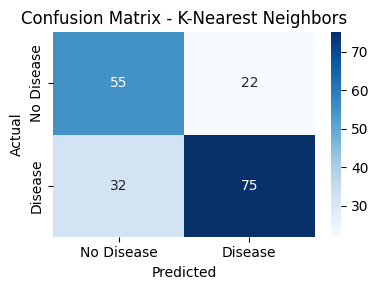


Decision Tree
Accuracy: 0.8478
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        77
           1       0.87      0.87      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



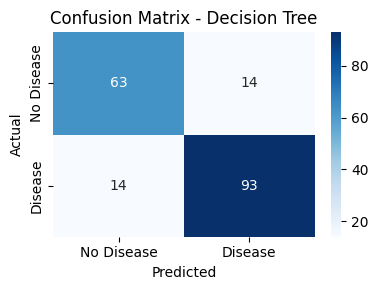


Random Forest
Accuracy: 0.8641
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



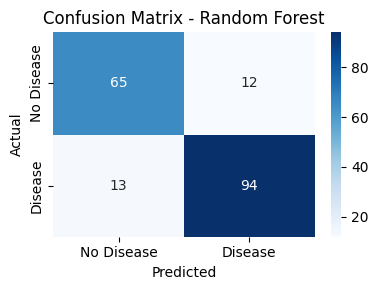


Gradient Boosting
Accuracy: 0.8641
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



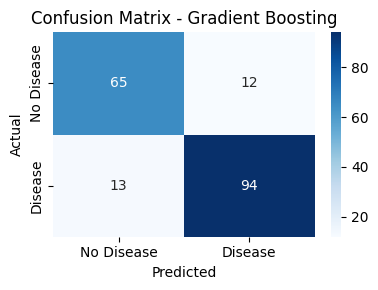


Support Vector Machine
Accuracy: 0.6848
              precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.68      0.69       184



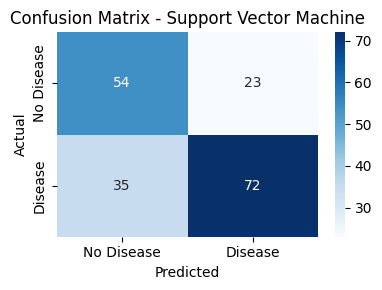


Naive Bayes
Accuracy: 0.8587
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



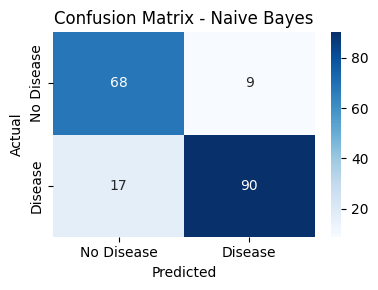


XGBoost
Accuracy: 0.8641
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



/home/arindam100/ml-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:26:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


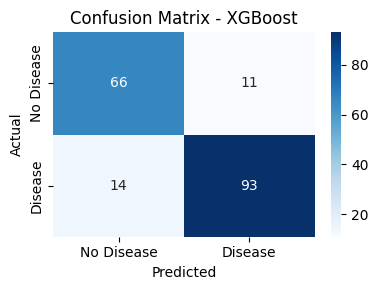

In [14]:
# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
# Evaluate each model
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Accuracy and classification report
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

Accuracy: 0.875
F1 Score: 0.892018779342723

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



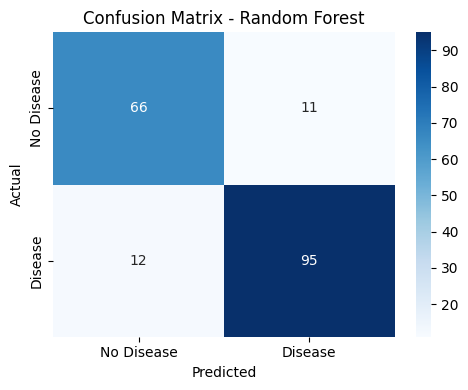

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Step 2: Train the model
best_rf = RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_split=2,n_estimators=300,random_state=42)
best_rf.fit(X_train, y_train)
# Step 3: Make predictions
y_pred = best_rf.predict(X_test)
# Step 4: Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# Step 5: Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Step 6: Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

/tmp/ipykernel_7520/3690446446.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


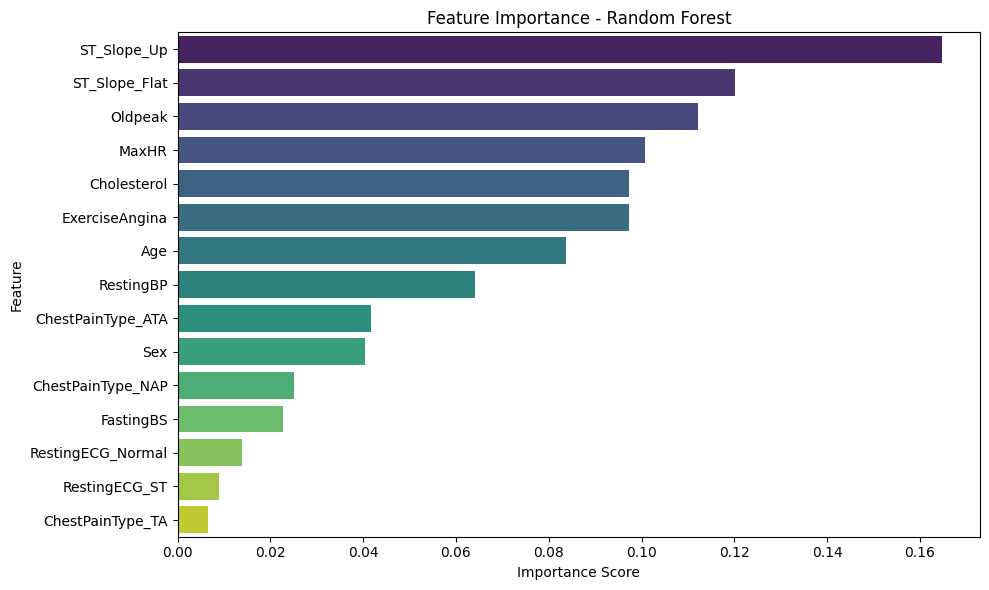

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = best_rf.feature_importances_
features = X_encoded.columns  # Ensure this is the DataFrame used for training
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Test Accuracy after PCA: 0.8913043478260869


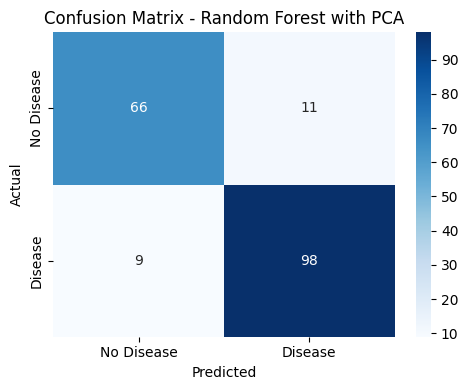

In [17]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Apply PCA
pca = PCA(n_components=13) 
X_pca = pca.fit_transform(X_train)

# Step 2: Train the model on PCA-transformed data
rf_pca = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=2, n_estimators=300, random_state=42)
rf_pca.fit(X_pca, y_train)
# Step 3: Transform test data using the same PCA
X_test_pca = pca.transform(X_test)
# Step 4: Make predictions and calculate accuracy
y_pred_pca = rf_pca.predict(X_test_pca)
print("Test Accuracy after PCA:", accuracy_score(y_test, y_pred_pca))


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion Matrix for PCA-based model
cm_pca = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Random Forest with PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

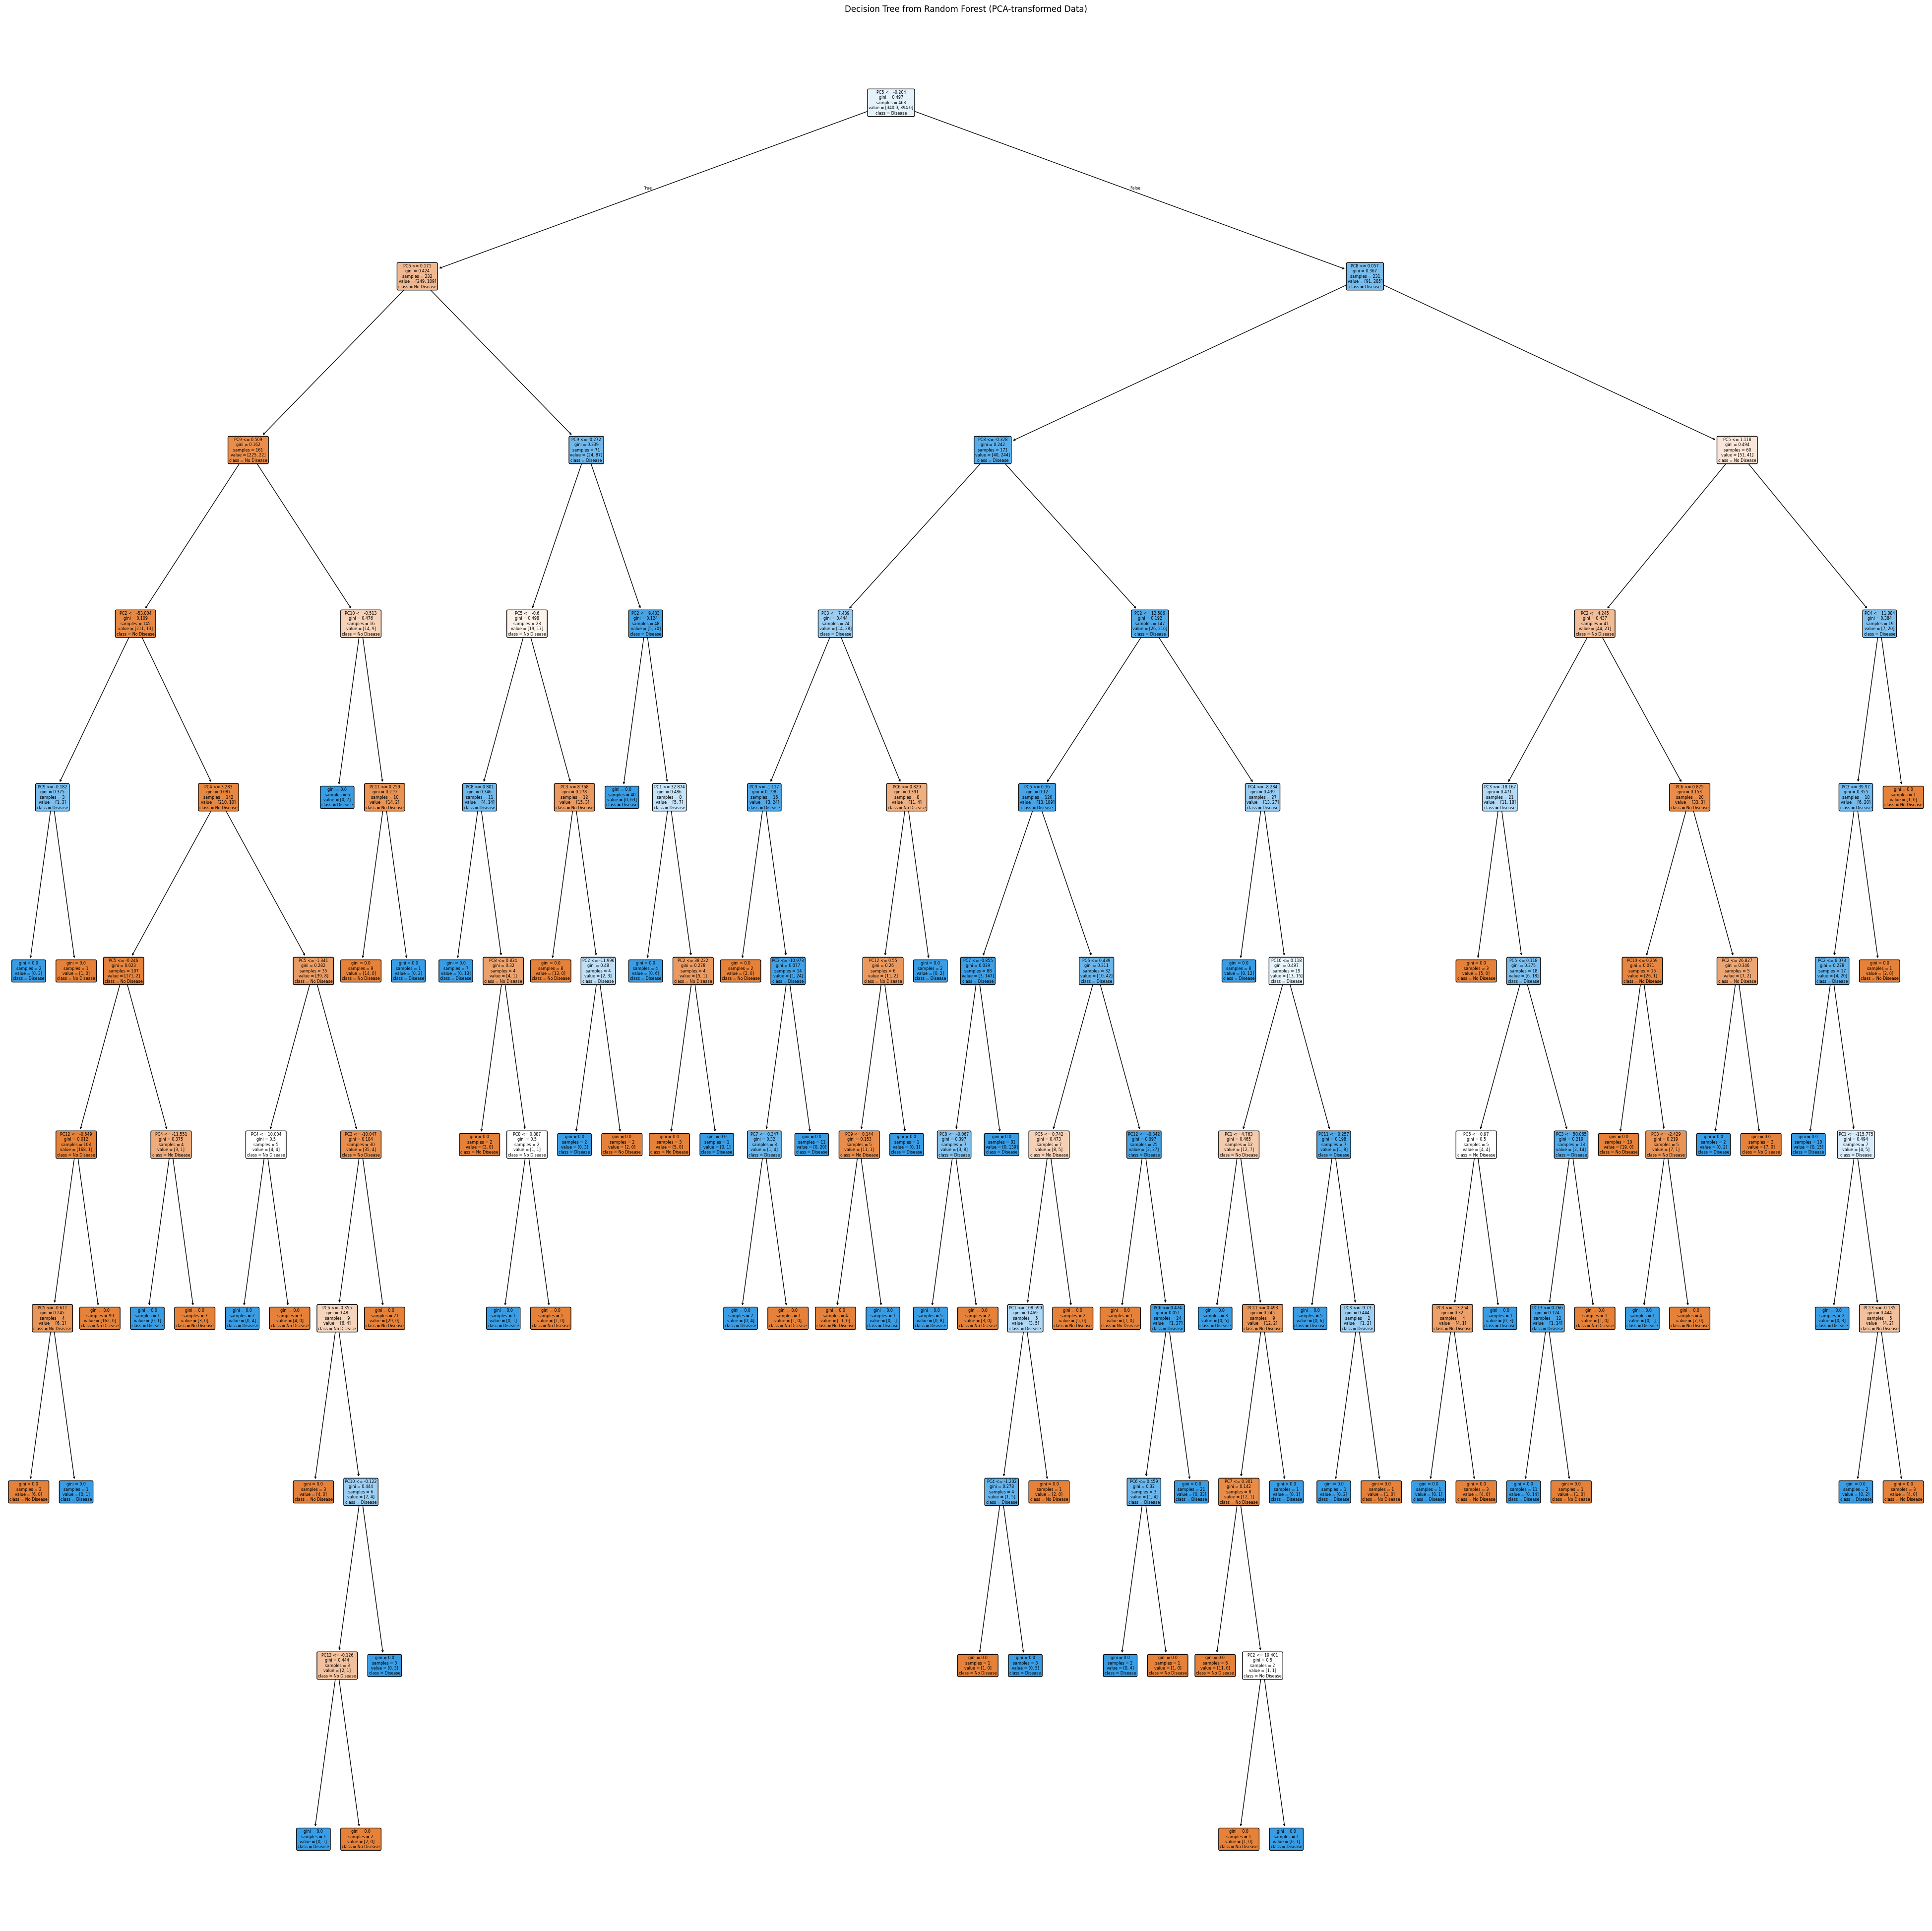

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the first tree in the random forest
plt.figure(figsize=(50, 50))
plot_tree(rf_pca.estimators_[0], filled=True, feature_names=[f'PC{i+1}' for i in range(13)], class_names=['No Disease', 'Disease'], rounded=True)
plt.title("Decision Tree from Random Forest (PCA-transformed Data)")
plt.show()


In [19]:
def predict_from_input():
    import pandas as pd

    # Step 1: Take user input
    age = int(input("Enter Age (e.g. 45): "))
    sex = input("Enter Sex (M/F): ")
    chest_pain = input("Enter Chest Pain Type (TA/ATA/NAP/ASY): ")
    resting_bp = int(input("Enter RestingBP (e.g. 120): "))
    cholesterol = int(input("Enter Cholesterol (e.g. 200): "))
    fasting_bs = int(input("FastingBS (0 or 1): "))
    resting_ecg = input("RestingECG (Normal/ST/LVH): ")
    max_hr = int(input("MaxHR (e.g. 150): "))
    exercise_angina = input("ExerciseAngina (Y/N): ")
    oldpeak = float(input("Oldpeak (e.g. 1.5): "))
    st_slope = input("ST_Slope (Up/Flat/Down): ")
    # Step 2: Create DataFrame
    input_df = pd.DataFrame([{
        'Age': age,
        'Sex': sex,
        'ChestPainType': chest_pain,
        'RestingBP': resting_bp,
        'Cholesterol': cholesterol,
        'FastingBS': fasting_bs,
        'RestingECG': resting_ecg,
        'MaxHR': max_hr,
        'ExerciseAngina': exercise_angina,
        'Oldpeak': oldpeak,
        'ST_Slope': st_slope
    }])
    # Step 3: Manual Encoding
    input_df['Sex'] = 1 if sex == 'M' else 0
    input_df['ExerciseAngina'] = 1 if exercise_angina == 'Y' else 0
    # One-hot encoding for multi-class features (match training columns)
    input_df = pd.get_dummies(input_df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)
    # Ensure all expected columns are present
    missing_cols = set(X_encoded.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0  # Add missing dummy columns with 0
    # Reorder columns to match training data
    input_df = input_df[X_encoded.columns]
    # Step 4: Apply PCA
    input_pca = pca.transform(input_df)
    # Step 5: Predict
    prediction = rf_pca.predict(input_pca)[0]
    result = "No Heart Disease" if prediction == 0 else "Likely Heart Disease"
    print(f"\nPrediction Result: {result}")

In [20]:
predict_from_input().







Enter Age (e.g. 45):  40
Enter Sex (M/F):  M
Enter Chest Pain Type (TA/ATA/NAP/ASY):  ATA
Enter RestingBP (e.g. 120):  140
Enter Cholesterol (e.g. 200):  289
FastingBS (0 or 1):  0
RestingECG (Normal/ST/LVH):  Normal
MaxHR (e.g. 150):  172
ExerciseAngina (Y/N):  N
Oldpeak (e.g. 1.5):  0
ST_Slope (Up/Flat/Down):  Up



Prediction Result: No Heart Disease
